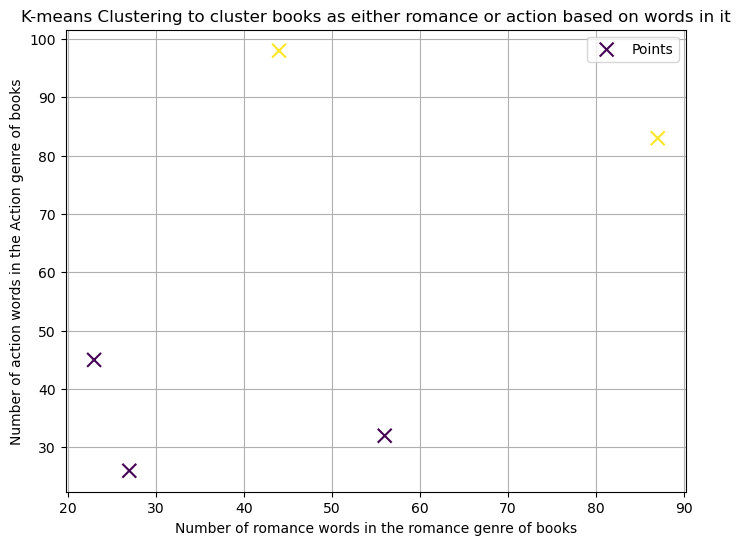

In [14]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Define the points
points = np.array([[23, 45], [56, 32], [44, 98], [27, 26], [87, 83]])

# Define the initial centroids
centroids = np.array([[35.33, 34.33], [65.5, 90.5]])

# Create KMeans instance with 2 clusters (since we have 2 centroids)
kmeans = KMeans(n_clusters=2, init=centroids, n_init=1)

# Fit KMeans to the data
kmeans.fit(points)

# Get cluster centroids
cluster_centroids = kmeans.cluster_centers_

# Get cluster labels for each point
cluster_labels = kmeans.labels_

# Plot the points
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], c=cluster_labels, cmap='viridis', marker='x', s=100, label='Points')

# Plot the cluster centroids
#plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], color='red', marker='x', s=200, label='Centroids')

plt.title('K-means Clustering to cluster books as either romance or action based on words in it')
plt.xlabel('Number of romance words in the romance genre of books')
plt.ylabel('Number of action words in the Action genre of books')
plt.legend()
plt.grid(True)
plt.show()


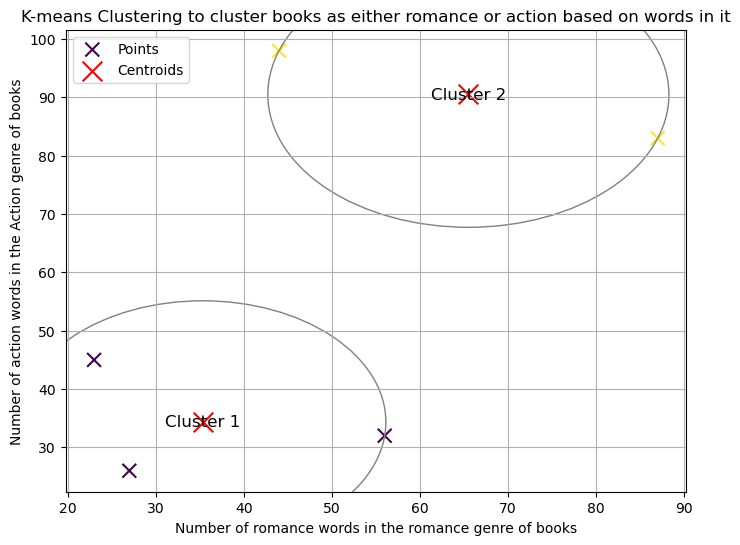

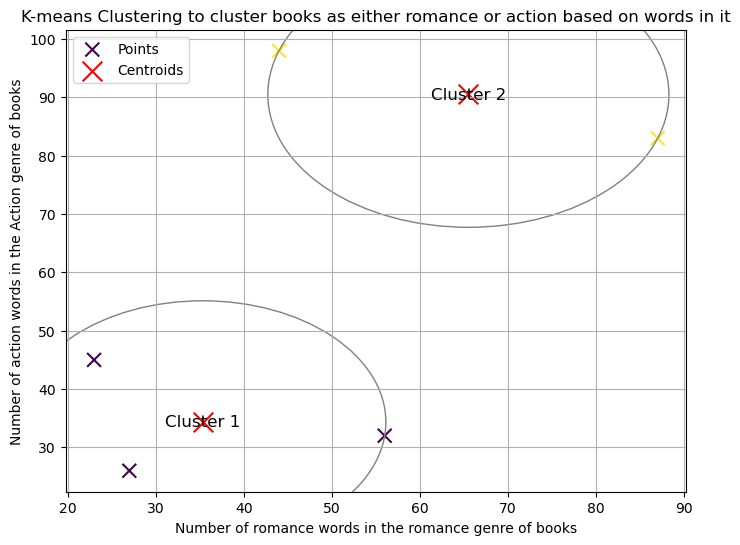

Converged after 2 iterations.


In [16]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

def plot_clusters(points, centroids, cluster_labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(points[:, 0], points[:, 1], c=cluster_labels, cmap='viridis', marker='x', s=100, label='Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroids')
    
    # Plot cluster circles and labels
    for i, centroid in enumerate(centroids):
        cluster_points = points[cluster_labels == i]
        radius = np.max(np.linalg.norm(cluster_points - centroid, axis=1))
        plt.gca().add_artist(plt.Circle(centroid, radius, color='gray', fill=False))
        plt.text(centroid[0], centroid[1], f'Cluster {i+1}', fontsize=12, ha='center', va='center')
    
    plt.title('K-means Clustering to cluster books as either romance or action based on words in it')
    plt.xlabel('Number of romance words in the romance genre of books')
    plt.ylabel('Number of action words in the Action genre of books')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define the points
points = np.array([[23, 45], [56, 32], [44, 98], [27, 26], [87, 83]])

# Define the initial centroids
centroids = np.array([[35.33, 34.33], [65.5, 90.5]])

# Create KMeans instance with 2 clusters (since we have 2 centroids)
kmeans = KMeans(n_clusters=2, init=centroids, n_init=1)

# Initialize variables for convergence check
prev_centroids = centroids
tolerance = 0.001
max_iter = 100
iter_count = 0

while iter_count < max_iter:
    # Fit KMeans to the data
    kmeans.fit(points)
    
    # Get cluster centroids and labels
    cluster_centroids = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    
    # Plot the clusters
    plot_clusters(points, cluster_centroids, cluster_labels)
    
    # Check for convergence
    if np.allclose(prev_centroids, cluster_centroids, atol=tolerance):
        print("Converged after", iter_count+1, "iterations.")
        break
    
    # Update centroids for next iteration
    prev_centroids = cluster_centroids
    iter_count += 1
